In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import PIL.Image
import glob
import pathlib

IMG_SIZE = (80,80)

In [2]:
data_dir = "simpsons_dataset"
data_dir = pathlib.Path(data_dir)
Image_count = len(list(data_dir.glob('*/*.jpg')))
Image_count

20933

In [3]:
import pathlib

data_test_dir = "kaggle_simpson_testset"
data_test_dir = pathlib.Path(data_test_dir)
image_count_test = len(list(data_test_dir.glob('*.jpg')))
image_count_test

1064

# Sieć konwolucyjna

Found 20933 images belonging to 42 classes.
Found 1064 validated image filenames belonging to 42 classes.
Epoch 1/20
655/655 [==============================] - 115s 171ms/step - loss: 2.6680 - accuracy: 0.2679 - val_loss: 2.3303 - val_accuracy: 0.3759
Epoch 2/20
655/655 [==============================] - 79s 121ms/step - loss: 2.0838 - accuracy: 0.4227 - val_loss: 1.9241 - val_accuracy: 0.4793
Epoch 3/20
655/655 [==============================] - 81s 124ms/step - loss: 1.8015 - accuracy: 0.5003 - val_loss: 1.6076 - val_accuracy: 0.5470
Epoch 4/20
655/655 [==============================] - 83s 127ms/step - loss: 1.5911 - accuracy: 0.5549 - val_loss: 1.3834 - val_accuracy: 0.6419
Epoch 5/20
655/655 [==============================] - 85s 129ms/step - loss: 1.4294 - accuracy: 0.5998 - val_loss: 1.2322 - val_accuracy: 0.6664
Epoch 6/20
655/655 [==============================] - 86s 131ms/step - loss: 1.2749 - accuracy: 0.6382 - val_loss: 1.1014 - val_accuracy: 0.7105
Epoch 7/20
655/655 [===

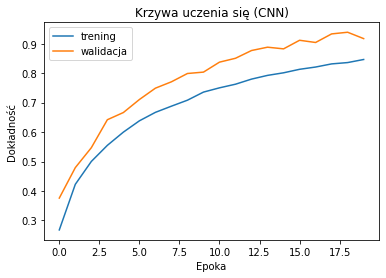

34/34 [==============================] - 2s 55ms/step - loss: 0.2815 - accuracy: 0.9173
Test accuracy: 0.9172932505607605, Test loss: 0.2815166413784027


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
import pandas as pd
import pathlib

# Tworzenie generatorów danych
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'simpsons_dataset',
    target_size=(32, 32),  # rozmiar obrazów
    batch_size=32,
    class_mode='categorical')

# Tworzenie odwrotnego mapowania
class_mapping = train_generator.class_indices
inverse_mapping = {v: k for k, v in class_mapping.items()}

# Lokalizacja folderu z obrazami testowymi
data_test_dir = pathlib.Path("kaggle_simpson_testset")

# Przygotowanie listy obrazów
images = [str(img) for img in data_test_dir.glob('*.jpg')]

# Tworzenie etykiet na podstawie nazw plików i mapowania klas
labels = [img.split('/')[-1].split('_')[0].lower() + '_' + img.split('_')[1].lower() for img in images]

# Usuwanie obrazów z etykietą 'unknown'
labels = [inverse_mapping.get(label, 'unknown') for label in labels]

# Tworzenie etykiet na podstawie nazw plików
labels = []
for img in images:
    label = img.split('/')[-1].split('_')[:-1]  # Usunięcie numeru z końca nazwy obrazka i branie tylko nazwy postaci
    label = '_'.join(label).lower()
    labels.append(label)

# Stworzenie DataFrame
df_test = pd.DataFrame({'filename': images, 'class': labels})

# Użycie flow_from_dataframe
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filename',
    y_col='class',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Liczba klas
num_classes = len(train_generator.class_indices)

# Tworzenie i kompilacja modelu
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Dopasowanie modelu
history_cnn = model_cnn.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator)

# Ocena
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Krzywa uczenia się (CNN)')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['trening', 'walidacja'], loc='upper left')
plt.show()

# Ewaluacja
# evaluate_model(model_cnn, test_generator, test_generator.classes)
# Ocena modelu na danych testowych
test_loss, test_accuracy = model_cnn.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")

Found 20933 images belonging to 42 classes.
Found 1064 validated image filenames belonging to 42 classes.
Epoch 1/30
655/655 [==============================] - 80s 119ms/step - loss: 2.6774 - accuracy: 0.2630 - val_loss: 2.2562 - val_accuracy: 0.4276
Epoch 2/30
655/655 [==============================] - 78s 119ms/step - loss: 2.0067 - accuracy: 0.4495 - val_loss: 1.7845 - val_accuracy: 0.5263
Epoch 3/30
655/655 [==============================] - 80s 122ms/step - loss: 1.6734 - accuracy: 0.5390 - val_loss: 1.4676 - val_accuracy: 0.5940
Epoch 4/30
655/655 [==============================] - 77s 118ms/step - loss: 1.4304 - accuracy: 0.6033 - val_loss: 1.2013 - val_accuracy: 0.6767
Epoch 5/30
655/655 [==============================] - 78s 119ms/step - loss: 1.2593 - accuracy: 0.6434 - val_loss: 1.0766 - val_accuracy: 0.7011
Epoch 6/30
655/655 [==============================] - 78s 119ms/step - loss: 1.1183 - accuracy: 0.6827 - val_loss: 0.9894 - val_accuracy: 0.7190
Epoch 7/30
655/655 [====

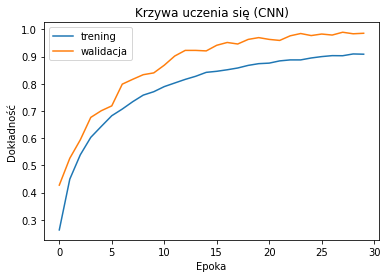

34/34 [==============================] - 2s 58ms/step - loss: 0.0677 - accuracy: 0.9859
Test accuracy: 0.9859022498130798, Test loss: 0.06774341315031052


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
import pandas as pd
import pathlib

# Tworzenie generatorów danych
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'simpsons_dataset',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical')

# Tworzenie odwrotnego mapowania
class_mapping = train_generator.class_indices
inverse_mapping = {v: k for k, v in class_mapping.items()}

# Lokalizacja folderu z obrazami testowymi
data_test_dir = pathlib.Path("kaggle_simpson_testset")

# Przygotowanie listy obrazów
images = [str(img) for img in data_test_dir.glob('*.jpg')]

# Tworzenie etykiet na podstawie nazw plików i mapowania klas
labels = [img.split('/')[-1].split('_')[0].lower() + '_' + img.split('_')[1].lower() for img in images]
labels = [inverse_mapping.get(label, 'unknown') for label in labels]

# Usuwanie obrazów z etykietą 'unknown'
# Przygotowanie listy obrazów

# Tworzenie etykiet na podstawie nazw plików
labels = []
for img in images:
    label = img.split('/')[-1].split('_')[:-1]
    label = '_'.join(label).lower()
    labels.append(label)

df_test = pd.DataFrame({'filename': images, 'class': labels})

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filename',
    y_col='class',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


num_classes = len(train_generator.class_indices)

model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Dopasowanie modelu
history_cnn = model_cnn.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator)

# Ocena modelu
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Krzywa uczenia się (CNN)')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['trening', 'walidacja'], loc='upper left')
plt.show()

# Evaluate model
# evaluate_model(model_cnn, test_generator, test_generator.classes)
# Ocena modelu na danych testowych
test_loss, test_accuracy = model_cnn.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")

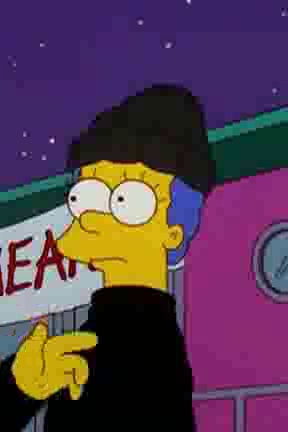

In [6]:
marge_simpson = list(data_dir.glob('marge_simpson/*'))
PIL.Image.open(str(marge_simpson[8]))

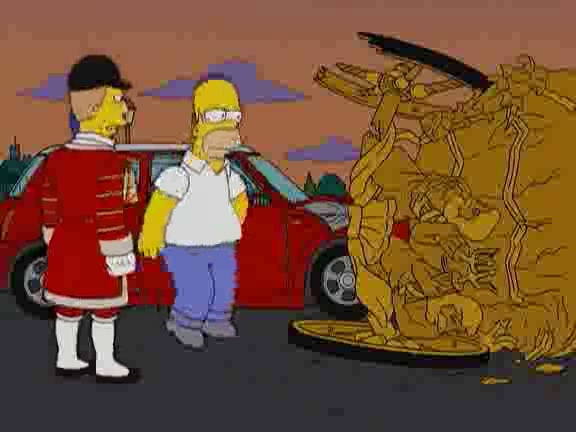

In [8]:
homer_simpson = list(data_dir.glob('homer_simpson/*'))
PIL.Image.open(str(homer_simpson[8]))

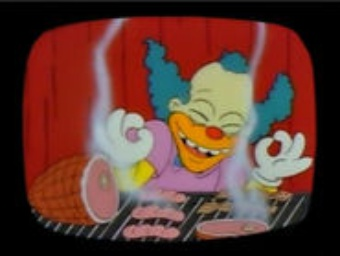

In [9]:
krusty_the_clown = list(data_dir.glob('krusty_the_clown/*'))
PIL.Image.open(str(krusty_the_clown[8]))

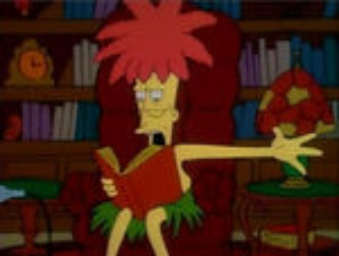

In [10]:
sideshow_bob = list(data_dir.glob('sideshow_bob/*'))
PIL.Image.open(str(sideshow_bob[8]))

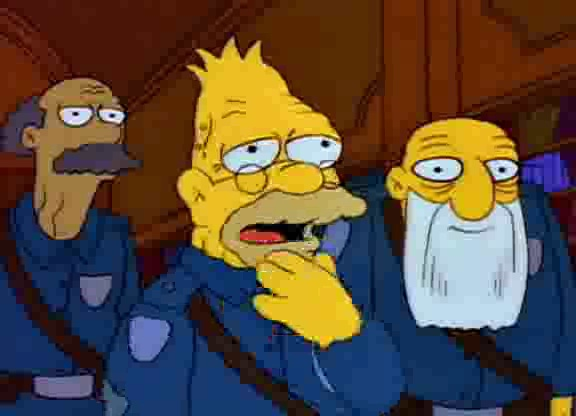

In [11]:
abraham_grampa_simpson = list(data_dir.glob('abraham_grampa_simpson/*'))
PIL.Image.open(str(abraham_grampa_simpson[8]))

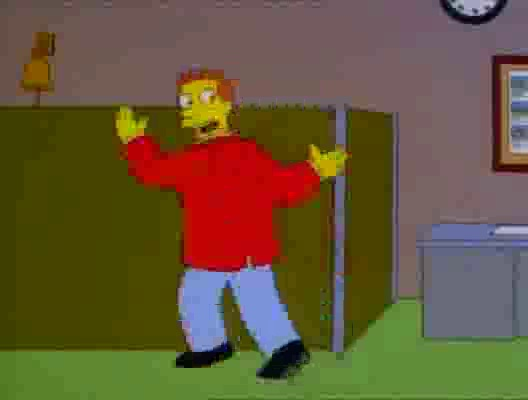

In [13]:
lionel_hutz = list(data_dir.glob('lionel_hutz/*'))
PIL.Image.open(str(lionel_hutz[2]))

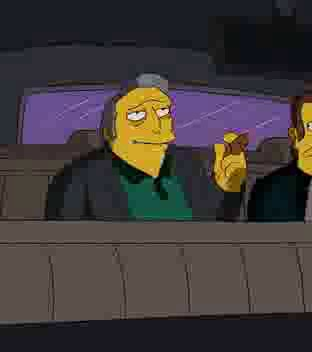

In [14]:
fat_tony = list(data_dir.glob('fat_tony/*'))
PIL.Image.open(str(fat_tony[8]))

In [15]:
filtered_items = [(img, label) for img, label in zip(images, labels) if label != 'unknown']
print(len(filtered_items))
print(inverse_mapping)

1064
{0: 'abraham_grampa_simpson', 1: 'agnes_skinner', 2: 'apu_nahasapeemapetilon', 3: 'barney_gumble', 4: 'bart_simpson', 5: 'carl_carlson', 6: 'charles_montgomery_burns', 7: 'chief_wiggum', 8: 'cletus_spuckler', 9: 'comic_book_guy', 10: 'disco_stu', 11: 'edna_krabappel', 12: 'fat_tony', 13: 'gil', 14: 'groundskeeper_willie', 15: 'homer_simpson', 16: 'kent_brockman', 17: 'krusty_the_clown', 18: 'lenny_leonard', 19: 'lionel_hutz', 20: 'lisa_simpson', 21: 'maggie_simpson', 22: 'marge_simpson', 23: 'martin_prince', 24: 'mayor_quimby', 25: 'milhouse_van_houten', 26: 'miss_hoover', 27: 'moe_szyslak', 28: 'ned_flanders', 29: 'nelson_muntz', 30: 'otto_mann', 31: 'patty_bouvier', 32: 'principal_skinner', 33: 'professor_john_frink', 34: 'rainier_wolfcastle', 35: 'ralph_wiggum', 36: 'selma_bouvier', 37: 'sideshow_bob', 38: 'sideshow_mel', 39: 'snake_jailbird', 40: 'troy_mcclure', 41: 'waylon_smithers'}


In [16]:
print(train_generator.class_indices)

{'abraham_grampa_simpson': 0, 'agnes_skinner': 1, 'apu_nahasapeemapetilon': 2, 'barney_gumble': 3, 'bart_simpson': 4, 'carl_carlson': 5, 'charles_montgomery_burns': 6, 'chief_wiggum': 7, 'cletus_spuckler': 8, 'comic_book_guy': 9, 'disco_stu': 10, 'edna_krabappel': 11, 'fat_tony': 12, 'gil': 13, 'groundskeeper_willie': 14, 'homer_simpson': 15, 'kent_brockman': 16, 'krusty_the_clown': 17, 'lenny_leonard': 18, 'lionel_hutz': 19, 'lisa_simpson': 20, 'maggie_simpson': 21, 'marge_simpson': 22, 'martin_prince': 23, 'mayor_quimby': 24, 'milhouse_van_houten': 25, 'miss_hoover': 26, 'moe_szyslak': 27, 'ned_flanders': 28, 'nelson_muntz': 29, 'otto_mann': 30, 'patty_bouvier': 31, 'principal_skinner': 32, 'professor_john_frink': 33, 'rainier_wolfcastle': 34, 'ralph_wiggum': 35, 'selma_bouvier': 36, 'sideshow_bob': 37, 'sideshow_mel': 38, 'snake_jailbird': 39, 'troy_mcclure': 40, 'waylon_smithers': 41}


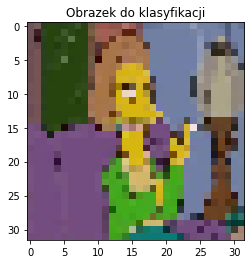

1/1 [==============================] - 0s 83ms/step
Obrazek został zaklasyfikowany jako: edna_krabappel


In [29]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

image_path = 'kaggle_simpson_testset/edna_krabappel_1.jpg'

# Wczytanie obrazka i zmiana jego rozmiaru
img = load_img(image_path, target_size=(32, 32))

# Wyświetlenie obrazka
plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

# Przekształcenie obrazka w tablicę
img_array = img_to_array(img)

# Skalowanie obrazka
img_array = img_array / 255.0

# Dodanie dodatkowego wymiaru do symulacji batch
img_array = np.expand_dims(img_array, axis=0)

# Klasyfikacja obrazka
predictions = model_cnn.predict(img_array)

# Pobranie indeksu najbardziej prawdopodobnej klasy
predicted_class_index = np.argmax(predictions[0])

# Znalezienie nazwy klasy
predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

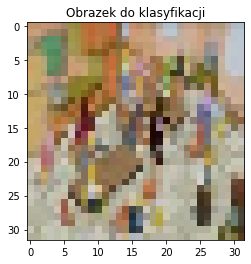

1/1 [==============================] - 0s 41ms/step
Obrazek został zaklasyfikowany jako: apu_nahasapeemapetilon


In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/edna_krabappel_13.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

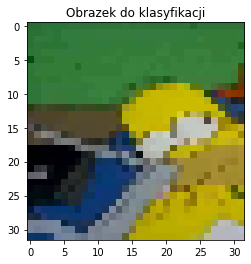

1/1 [==============================] - 0s 39ms/step
Obrazek został zaklasyfikowany jako: homer_simpson


In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/homer_simpson_40.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

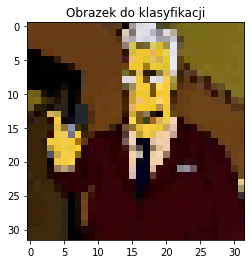

1/1 [==============================] - 0s 49ms/step
Obrazek został zaklasyfikowany jako: kent_brockman


In [31]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/kent_brockman_10.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

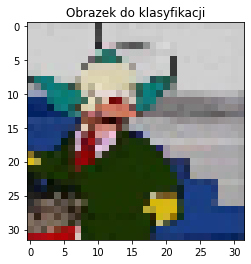

1/1 [==============================] - 0s 37ms/step
Obrazek został zaklasyfikowany jako: krusty_the_clown


In [32]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/krusty_the_clown_12.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

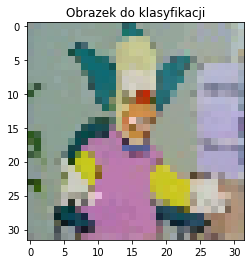

1/1 [==============================] - 0s 48ms/step
Obrazek został zaklasyfikowany jako: krusty_the_clown


In [33]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/krusty_the_clown_46.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

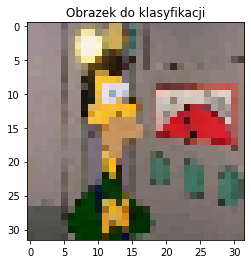

1/1 [==============================] - 0s 56ms/step
Obrazek został zaklasyfikowany jako: lenny_leonard


In [34]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/lenny_leonard_1.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

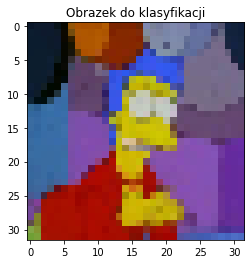

1/1 [==============================] - 0s 46ms/step
Obrazek został zaklasyfikowany jako: marge_simpson


In [35]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/marge_simpson_12.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

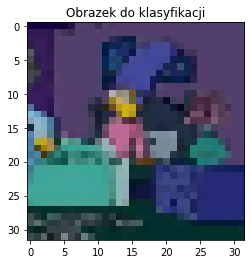

1/1 [==============================] - 0s 44ms/step
Obrazek został zaklasyfikowany jako: marge_simpson


In [36]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/marge_simpson_19.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

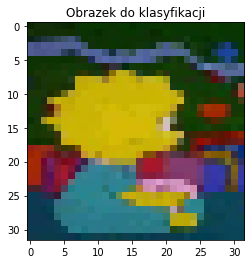

1/1 [==============================] - 0s 46ms/step
Obrazek został zaklasyfikowany jako: lisa_simpson


In [37]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/lisa_simpson_3.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

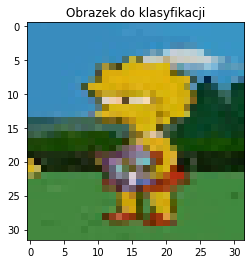

1/1 [==============================] - 0s 59ms/step
Obrazek został zaklasyfikowany jako: lisa_simpson


In [38]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/lisa_simpson_7.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

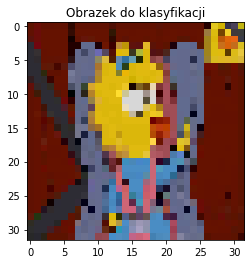

1/1 [==============================] - 0s 61ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [39]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/maggie_simpson_0.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

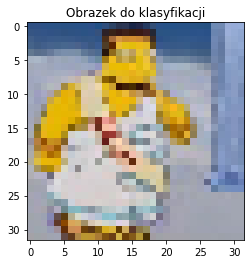

1/1 [==============================] - 0s 50ms/step
Obrazek został zaklasyfikowany jako: moe_szyslak


In [40]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/mayor_quimby_1.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

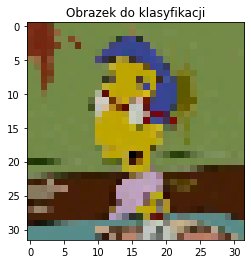

1/1 [==============================] - 0s 61ms/step
Obrazek został zaklasyfikowany jako: milhouse_van_houten


In [41]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/milhouse_van_houten_41.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

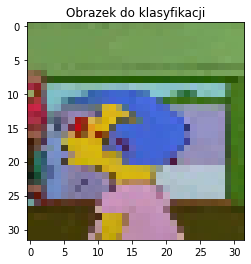

1/1 [==============================] - 0s 48ms/step
Obrazek został zaklasyfikowany jako: milhouse_van_houten


In [42]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/milhouse_van_houten_6.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

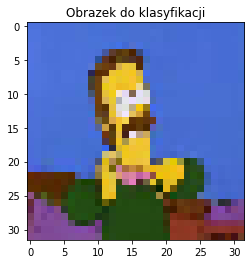

1/1 [==============================] - 0s 58ms/step
Obrazek został zaklasyfikowany jako: ned_flanders


In [43]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/ned_flanders_29.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_cnn.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

Found 20933 images belonging to 42 classes.
Found 1064 validated image filenames belonging to 42 classes.
Epoch 1/20
655/655 [==============================] - 74s 110ms/step - loss: 2.6672 - accuracy: 0.2685 - val_loss: 2.2448 - val_accuracy: 0.4145
Epoch 2/20
655/655 [==============================] - 52s 79ms/step - loss: 2.0070 - accuracy: 0.4527 - val_loss: 1.7454 - val_accuracy: 0.5254
Epoch 3/20
655/655 [==============================] - 51s 78ms/step - loss: 1.6885 - accuracy: 0.5339 - val_loss: 1.4485 - val_accuracy: 0.5977
Epoch 4/20
655/655 [==============================] - 58s 89ms/step - loss: 1.4589 - accuracy: 0.5899 - val_loss: 1.2061 - val_accuracy: 0.6588
Epoch 5/20
655/655 [==============================] - 58s 88ms/step - loss: 1.2961 - accuracy: 0.6298 - val_loss: 1.0710 - val_accuracy: 0.6964
Epoch 6/20
655/655 [==============================] - 53s 81ms/step - loss: 1.1569 - accuracy: 0.6679 - val_loss: 0.9211 - val_accuracy: 0.7350
Epoch 7/20
655/655 [=========

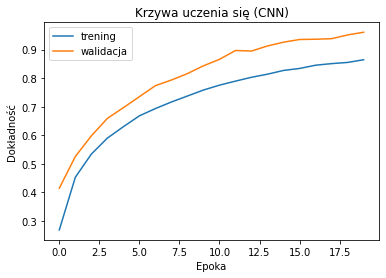

34/34 [==============================] - 1s 35ms/step - loss: 0.1628 - accuracy: 0.9605
Test accuracy: 0.9605262875556946, Test loss: 0.16277897357940674


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers

# Tworzenie generatorów danych
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'simpsons_dataset',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical')

import pandas as pd
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers

# Lokalizacja folderu z obrazami testowymi
data_test_dir = pathlib.Path("kaggle_simpson_testset")

# Przygotowanie listy obrazów
images = [str(img) for img in data_test_dir.glob('*.jpg')]

# Tworzenie etykiet na podstawie nazw plików i mapowania klas
labels = [img.split('/')[-1].split('_')[0].lower() + '_' + img.split('_')[1].lower() for img in images]
# Usuwanie obrazów z etykietą 'unknown'
labels = [inverse_mapping.get(label, 'unknown') for label in labels]

images = [str(img) for img in data_test_dir.glob('*.jpg')]

# Tworzenie etykiet na podstawie nazw plików
labels = []
for img in images:
    label = img.split('/')[-1].split('_')[:-1]  # Usuwamy numer z końca i bierzemy tylko nazwę postaci
    label = '_'.join(label).lower()  # Łączymy części nazwy i zamieniamy na małe litery
    labels.append(label)

# Stworzenie DataFrame
df_test = pd.DataFrame({'filename': images, 'class': labels})

# Użycie flow_from_dataframe
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filename',
    y_col='class',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',  # Ustaw na 'categorical', jeśli masz etykiety
    shuffle=False)


# Liczba klas
num_classes = len(train_generator.class_indices)

# Tworzenie i kompilacja modelu (jak w Twoim kodzie)
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Dopasowanie modelu
history_cnn = model_cnn.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator)

# Ocena modelu
# Upewnij się, że masz funkcję evaluate_model zdefiniowaną lub użyj model_cnn.evaluate
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Krzywa uczenia się (CNN)')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['trening', 'walidacja'], loc='upper left')
plt.show()

# Evaluate model
#evaluate_model(model_cnn, test_generator, test_generator.classes)
# Ocena modelu na danych testowych
test_loss, test_accuracy = model_cnn.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")

# VGG

Epoch 1/20
655/655 [==============================] - 162s 246ms/step - loss: 2.9301 - accuracy: 0.1768 - val_loss: 2.8484 - val_accuracy: 0.2425
Epoch 2/20
655/655 [==============================] - 164s 250ms/step - loss: 2.6399 - accuracy: 0.2557 - val_loss: 2.6767 - val_accuracy: 0.2735
Epoch 3/20
655/655 [==============================] - 167s 255ms/step - loss: 2.5220 - accuracy: 0.2912 - val_loss: 2.5170 - val_accuracy: 0.3280
Epoch 4/20
655/655 [==============================] - 158s 241ms/step - loss: 2.4369 - accuracy: 0.3102 - val_loss: 2.4279 - val_accuracy: 0.3430
Epoch 5/20
655/655 [==============================] - 210s 321ms/step - loss: 2.3718 - accuracy: 0.3307 - val_loss: 2.3639 - val_accuracy: 0.3515
Epoch 6/20
655/655 [==============================] - 255s 390ms/step - loss: 2.3160 - accuracy: 0.3435 - val_loss: 2.2970 - val_accuracy: 0.3647
Epoch 7/20
655/655 [==============================] - 189s 288ms/step - loss: 2.2810 - accuracy: 0.3519 - val_loss: 2.2281 -

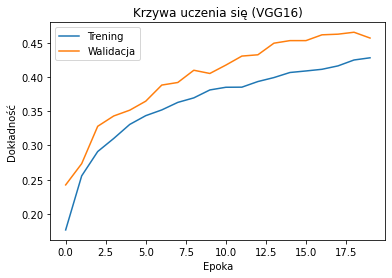

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# wytrenowany model VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Zamroź wagi modelu bazowego
for layer in base_model.layers:
    layer.trainable = False

# Dodaj nowe warstwy do modelu
num_classes = len(train_generator.class_indices)  # Liczba klas w zbiorze "Simpsonowie"
model_transfer = models.Sequential()
model_transfer.add(base_model)
model_transfer.add(layers.Flatten())
model_transfer.add(layers.Dense(128, activation='relu'))
model_transfer.add(layers.Dropout(0.5))
model_transfer.add(layers.Dense(num_classes, activation='softmax'))

# Kompilacja
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trening modelu na zbiorze treningowym "Simpsonowie"
history_transfer = model_transfer.fit(train_generator, epochs=20, validation_data=test_generator)

# Wykres krzywej uczenia się
plt.plot(history_transfer.history['accuracy'])
plt.plot(history_transfer.history['val_accuracy'])
plt.title('Krzywa uczenia się (VGG16)')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['Trening', 'Walidacja'], loc='upper left')
plt.show()

Epoch 1/30
655/655 [==============================] - 220s 332ms/step - loss: 2.9529 - accuracy: 0.1650 - val_loss: 2.8748 - val_accuracy: 0.2143
Epoch 2/30
655/655 [==============================] - 222s 339ms/step - loss: 2.6540 - accuracy: 0.2491 - val_loss: 2.6792 - val_accuracy: 0.2735
Epoch 3/30
655/655 [==============================] - 224s 341ms/step - loss: 2.5309 - accuracy: 0.2862 - val_loss: 2.5752 - val_accuracy: 0.2998
Epoch 4/30
655/655 [==============================] - 217s 330ms/step - loss: 2.4518 - accuracy: 0.3081 - val_loss: 2.4491 - val_accuracy: 0.3195
Epoch 5/30
655/655 [==============================] - 204s 312ms/step - loss: 2.3913 - accuracy: 0.3222 - val_loss: 2.3794 - val_accuracy: 0.3496
Epoch 6/30
655/655 [==============================] - 221s 337ms/step - loss: 2.3412 - accuracy: 0.3323 - val_loss: 2.3116 - val_accuracy: 0.3741
Epoch 7/30
655/655 [==============================] - 226s 346ms/step - loss: 2.2995 - accuracy: 0.3456 - val_loss: 2.2736 -

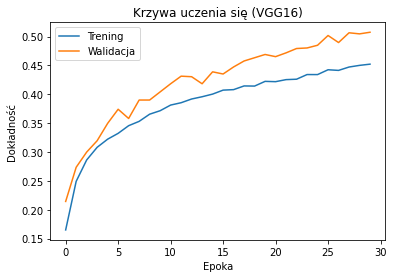

In [44]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# wytrenowany model VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Zamroź wagi modelu bazowego
for layer in base_model.layers:
    layer.trainable = False

# Dodaj nowe warstwy do modelu
num_classes = len(train_generator.class_indices)  # Liczba klas w zbiorze "Simpsonowie"
model_transfer = models.Sequential()
model_transfer.add(base_model)
model_transfer.add(layers.Flatten())
model_transfer.add(layers.Dense(128, activation='relu'))
model_transfer.add(layers.Dropout(0.5))
model_transfer.add(layers.Dense(num_classes, activation='softmax'))

# Kompilacja modelu
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trening modelu na zbiorze treningowym "Simpsonowie"
history_transfer = model_transfer.fit(
    , epochs=30, validation_data=test_generator)

# Wykres krzywej uczenia się
plt.plot(history_transfer.history['accuracy'])
plt.plot(history_transfer.history['val_accuracy'])
plt.title('Krzywa uczenia się (VGG16)')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['Trening', 'Walidacja'], loc='upper left')
plt.show()

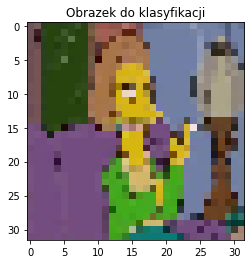

1/1 [==============================] - 0s 47ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [48]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Przy założeniu, że model_transfer jest już wytrenowany i dostępny w tym środowisku
# oraz że inverse_mapping jest zdefiniowane

image_path = 'kaggle_simpson_testset/edna_krabappel_1.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

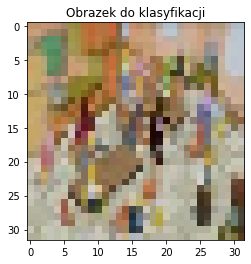

1/1 [==============================] - 0s 30ms/step
Obrazek został zaklasyfikowany jako: rainier_wolfcastle


In [49]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/edna_krabappel_13.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

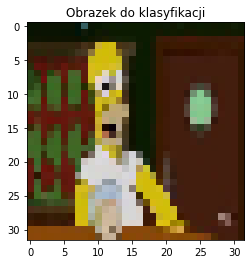

1/1 [==============================] - 0s 46ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [50]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/homer_simpson_2.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

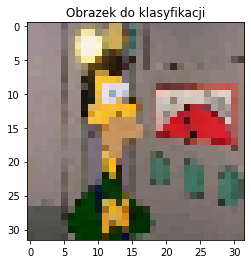

1/1 [==============================] - 0s 40ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [51]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/lenny_leonard_1.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

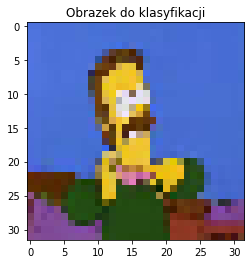

1/1 [==============================] - 0s 36ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [52]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/ned_flanders_29.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

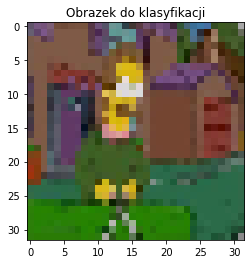

1/1 [==============================] - 0s 33ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [53]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/ned_flanders_5.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

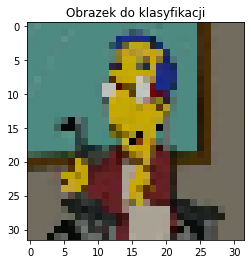

1/1 [==============================] - 0s 37ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [55]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/milhouse_van_houten_3.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

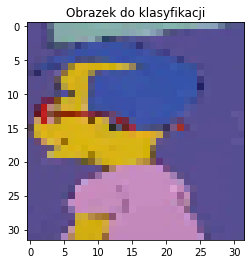

1/1 [==============================] - 0s 42ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [56]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/milhouse_van_houten_14.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

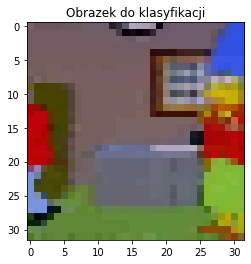

1/1 [==============================] - 0s 32ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [57]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/marge_simpson_3.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

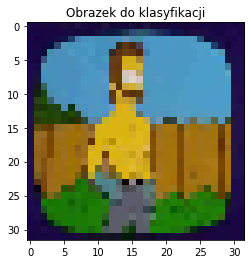

1/1 [==============================] - 0s 37ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [58]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/ned_flanders_48.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

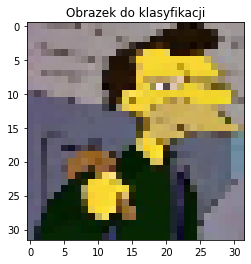

1/1 [==============================] - 0s 35ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [59]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/lenny_leonard_15.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

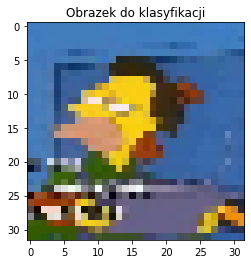

1/1 [==============================] - 0s 30ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [60]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/lenny_leonard_8.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

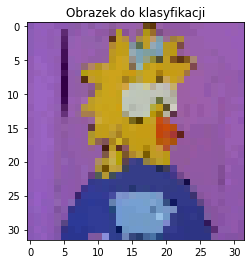

1/1 [==============================] - 0s 31ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [62]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/maggie_simpson_1.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

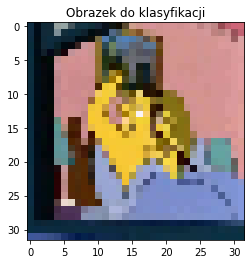

1/1 [==============================] - 0s 29ms/step
Obrazek został zaklasyfikowany jako: maggie_simpson


In [63]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/mayor_quimby_19.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

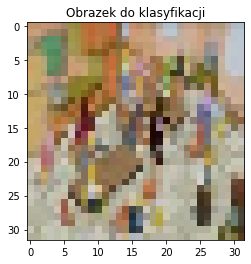

1/1 [==============================] - 0s 45ms/step
Obrazek został zaklasyfikowany jako: rainier_wolfcastle


In [64]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/edna_krabappel_13.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'simpsons_dataset',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'simpsons_dataset',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

Found 20933 images belonging to 42 classes.
Found 20933 images belonging to 42 classes.


In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Zamroź wagi modelu bazowego, żeby zachować nauczoną wiedzę
for layer in base_model.layers:
    layer.trainable = False

model_transfer = models.Sequential()
model_transfer.add(base_model)
model_transfer.add(layers.Flatten())

model_transfer.add(layers.BatchNormalization()) # Dodany Batch Normalization

model_transfer.add(layers.Dense(128, activation='relu'))
model_transfer.add(layers.Dropout(0.5))  # Dodany Dropout

model_transfer.add(layers.Dense(num_classes, activation='softmax'))

model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'num_classes' is not defined

In [67]:
history_transfer = model_transfer.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
655/655 [==============================] - 446s 677ms/step - loss: 3.0392 - accuracy: 0.1667 - val_loss: 2.5640 - val_accuracy: 0.2857
Epoch 2/20
655/655 [==============================] - 486s 742ms/step - loss: 2.7411 - accuracy: 0.2266 - val_loss: 2.4221 - val_accuracy: 0.3247
Epoch 3/20
655/655 [==============================] - 449s 686ms/step - loss: 2.6489 - accuracy: 0.2522 - val_loss: 2.3622 - val_accuracy: 0.3343
Epoch 4/20
655/655 [==============================] - 513s 784ms/step - loss: 2.6149 - accuracy: 0.2627 - val_loss: 2.3158 - val_accuracy: 0.3454
Epoch 5/20
655/655 [==============================] - 511s 780ms/step - loss: 2.5792 - accuracy: 0.2728 - val_loss: 2.2913 - val_accuracy: 0.3507
Epoch 6/20
655/655 [==============================] - 450s 687ms/step - loss: 2.5729 - accuracy: 0.2757 - val_loss: 2.2528 - val_accuracy: 0.3645
Epoch 7/20
655/655 [==============================] - 521s 796ms/step - loss: 2.5450 - accuracy: 0.2799 - val_loss: 2.2159 -

In [68]:
predictions = model_transfer.predict(test_generator)

655/655 [==============================] - 211s 321ms/step


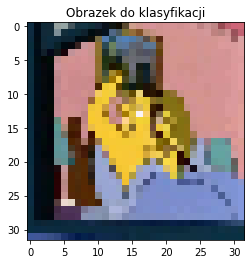

1/1 [==============================] - 0s 318ms/step
Obrazek został zaklasyfikowany jako: charles_montgomery_burns


In [69]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/mayor_quimby_19.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

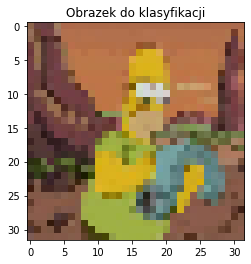

1/1 [==============================] - 0s 106ms/step
Obrazek został zaklasyfikowany jako: abraham_grampa_simpson


In [70]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/homer_simpson_1.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

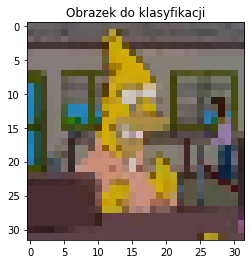

1/1 [==============================] - 0s 60ms/step
Obrazek został zaklasyfikowany jako: homer_simpson


In [71]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/abraham_grampa_simpson_4.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

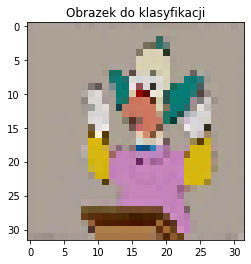

1/1 [==============================] - 0s 49ms/step
Obrazek został zaklasyfikowany jako: krusty_the_clown


In [72]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/krusty_the_clown_20.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

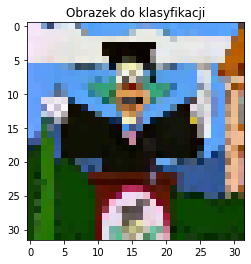

1/1 [==============================] - 0s 45ms/step
Obrazek został zaklasyfikowany jako: apu_nahasapeemapetilon


In [73]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/krusty_the_clown_5.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

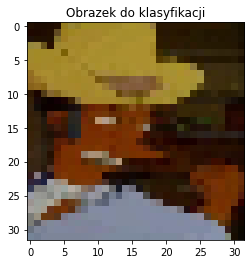

1/1 [==============================] - 0s 52ms/step
Obrazek został zaklasyfikowany jako: homer_simpson


In [74]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/apu_nahasapeemapetilon_4.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

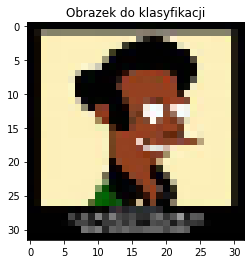

1/1 [==============================] - 0s 83ms/step
Obrazek został zaklasyfikowany jako: chief_wiggum


In [75]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/apu_nahasapeemapetilon_6.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")

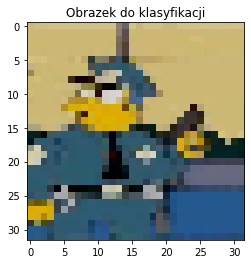

1/1 [==============================] - 0s 41ms/step
Obrazek został zaklasyfikowany jako: comic_book_guy


In [76]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

image_path = 'kaggle_simpson_testset/chief_wiggum_9.jpg'

img = load_img(image_path, target_size=(32, 32))

plt.imshow(img)
plt.title("Obrazek do klasyfikacji")
plt.show()

img_array = img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model_transfer.predict(img_array)

predicted_class_index = np.argmax(predictions[0])

predicted_class = inverse_mapping[predicted_class_index]

print(f"Obrazek został zaklasyfikowany jako: {predicted_class}")